# HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

### Data Preparation :
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-years risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 300 records and 14 attributes.


Attribute Information:
> age - age in years   
>  sex - (1 = male; 0 = female)   
> cp - chest pain type     
> trestbps - resting blood pressure (in mm Hg on admission to the hospital    
> chol - serum cholestoral in mg/dl   
> fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)   
> restecg - resting electrocardiographic results   
> thalach - maximum heart rate achieved   
> exang - exercise induced angina (1 = yes; 0 = no)    
> oldpeak - ST depression induced by exercise relative to rest   
> slope - the slope of the peak exercise ST segment   
> ca - number of major vessels (0-3) colored by flourosopy     
> thal - 3 = normal; 6 = fixed defect; 7 = reversable defect   
> target - have disease or not (1=yes, 0=no)   


In [1]:
#Importing the libraries

import pandas as pd 
import numpy as np 
import scipy.optimize as opt 
import statsmodels.api as sm 
from sklearn import preprocessing 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the data

df = pd.read_csv(r'heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Exploration

##### Finding the count of targets with heart disease and not heart disease


In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
#Checking the heart disease rate

hdr = (sum(df['target'])/len(df['target'].index))*100
print("People with heart disease: ", hdr , "%")

People with heart disease:  54.45544554455446 %


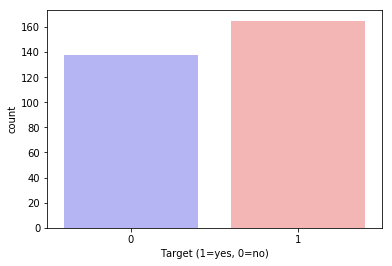

In [5]:
#plotting it in countplot

sns.countplot(x='target',data = df , palette= "bwr" )
plt.xlabel("Target (1=yes, 0=no)")
plt.show()

##### Finding the count of male and female

In [6]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
sex = (sum(df['sex'])/len(df['sex'].index))*100
print("Percentage of men patients: ", sex , "%")
print("Percentage of women patients: ", (100-sex) ,"%")

Percentage of men patients:  68.31683168316832 %
Percentage of women patients:  31.683168316831683 %


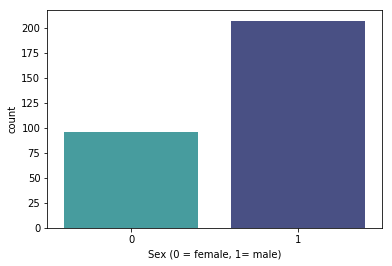

In [8]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


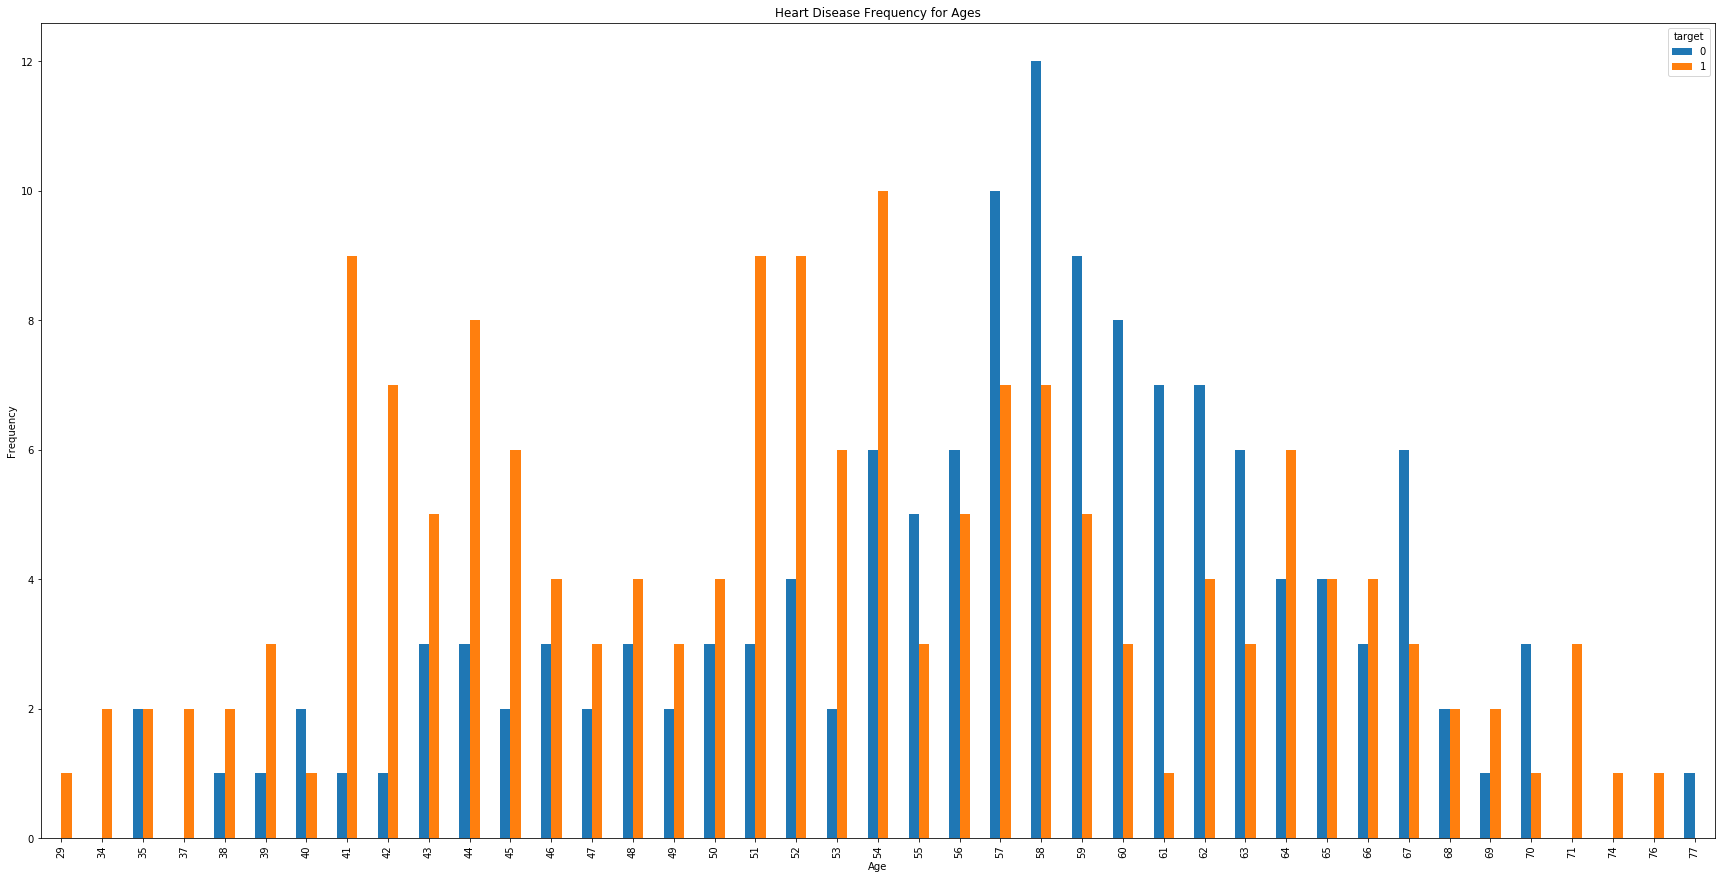

In [10]:
# Lets see the rship between age and heart disease

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(30,15))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

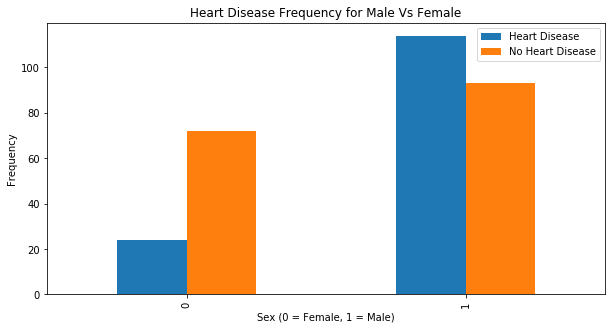

In [11]:
# Lets see the rship between sex and heart disease

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5))
plt.title('Heart Disease Frequency for Male Vs Female')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Heart Disease", "No Heart Disease"])
plt.ylabel('Frequency')
plt.show()

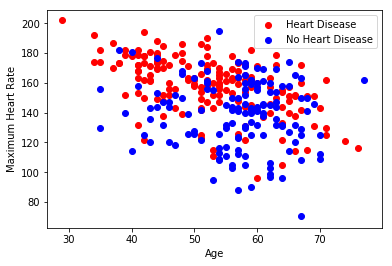

In [12]:
# Relationship between age(Age) and maximum heart rate (thalach) with heart disease

plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="blue")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

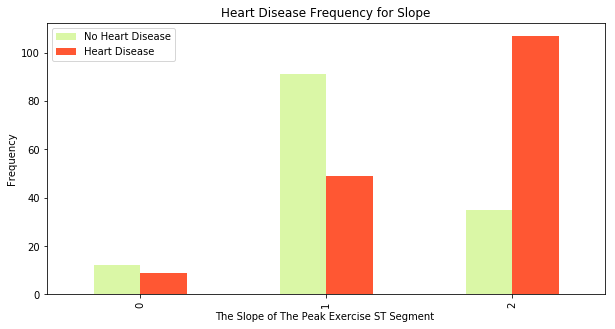

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(10,5),color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

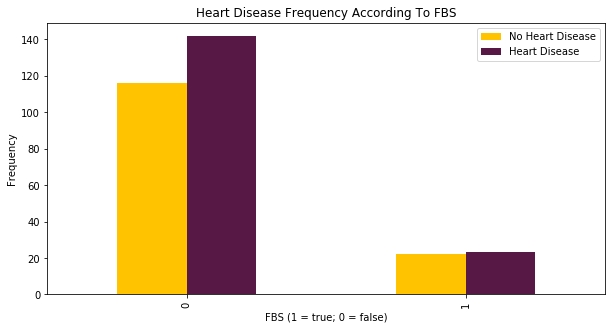

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(10,5), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS (1 = true; 0 = false)')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

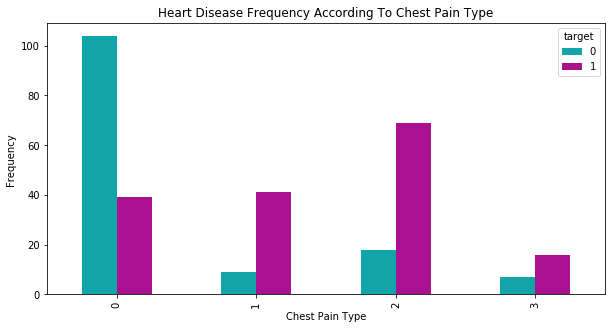

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency ')
plt.show()

### Creating Dummy Variables
Since 'cp', 'thal' and 'slope' are categorical variables, we'll turn them into dummy variables.

In [16]:
a = pd.get_dummies(df['cp'], prefix = "cp", drop_first=True)
df = pd.concat([df,a],axis=1)

b = pd.get_dummies(df['thal'], prefix = "thal", drop_first=True)
df = pd.concat([df,b],axis=1)

c = pd.get_dummies(df['slope'], prefix = "slope", drop_first=True)
df = pd.concat([df,c],axis=1)

In [17]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,0,0,0,1,0,0,1
5,57,1,0,140,192,0,1,148,0,0.4,...,1,1,0,0,0,1,0,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,...,2,1,1,0,0,0,1,0,1,0
7,44,1,1,120,263,0,1,173,0,0.0,...,3,1,1,0,0,0,0,1,0,1
8,52,1,2,172,199,1,1,162,0,0.5,...,3,1,0,1,0,0,0,1,0,1
9,57,1,2,150,168,0,1,174,0,1.6,...,2,1,0,1,0,0,1,0,0,1


In [18]:
df= df.drop(['cp','thal','slope'],axis=1)


In [19]:
df.shape

(303, 19)

##### Checking for outliers in the continuous variables

In [20]:
out_df = df[['trestbps','chol','thalach','oldpeak']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
out_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,149.646865,1.039604
std,17.538143,51.830751,22.905161,1.161075
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000
50%,130.000000,240.000000,153.000000,0.800000
75%,140.000000,274.500000,166.000000,1.600000
90%,152.000000,308.800000,176.600000,2.800000
95%,160.000000,326.900000,181.900000,3.400000
99%,180.000000,406.740000,191.960000,4.200000


As the nos are gradually increasing , there are no outliers

#### Checking for missing values and imputing them


In [21]:
# Adding up the missing values (column-wise)
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_1        0
cp_2        0
cp_3        0
thal_1      0
thal_2      0
thal_3      0
slope_1     0
slope_2     0
dtype: int64

In [22]:
y=df['target'].values
type(y)

numpy.ndarray

In [23]:
x_data= df.drop(['target'],axis=1)
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,0,0,0,0,1,1,0
299,45,1,110,264,0,1,132,0,1.2,0,0,0,1,0,0,1,1,0
300,68,1,144,193,1,1,141,0,3.4,2,0,0,0,0,0,1,1,0
301,57,1,130,131,0,1,115,1,1.2,1,0,0,0,0,0,1,1,0


#### Normalize data

In [24]:
X = (x_data-np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
X

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [25]:
#Normalize the data using Standard scaler

#from sklearn.preprocessing import StandardScaler
#X_std = StandardScaler().fit_transform(x_data)
#dfNorm = pd.DataFrame(X, index=df.index, columns=X.columns[0:18])
# # add non-feature target column to dataframe
#dfNorm['target'] = df['target']
#dfNorm
#X = dfNorm.iloc[:,0:18].values
#y = dfNorm.iloc[:,18].values

In [26]:
dfNorm = pd.DataFrame(X, index=df.index, columns=X.columns[0:18])
dfNorm['target'] = df['target']
dfNorm

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,target
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


#### TRAIN TEST SPLIT

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size= 0.3 , random_state=100)

In [64]:
#### Importing Logistic Regression using SKlearn

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

accuracies = {}
acc = logreg.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 87.91%


This is directly using sklearn without removing any features where we are getting a good score but we cannot rely on this. We need to calculate the overall accuracy,Sensitivity and Specificity score .

#### Running our First Training Model

In [28]:
import statsmodels.api as sm

In [29]:
# Logistic regression model / Generalized Linear Model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75.745
Date:                Sat, 09 May 2020   Deviance:                       151.49
Time:                        09:38:52   Pearson chi2:                     266.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8278   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
age            0.7313      1.323      0.553      0.581      -1.863       3.325
sex           -1.2561      0.590     -2.130      0.033      -2.412      -0.100
trestbps      -0.4931      1.371     -0.360      0.719      -3.181       2.195
chol          -3.1632      2.300     -1.375      0.169      -7.671       1.344
fbs           -0.3208      0.640     -0.502      0.616      -1.574       0.933
restecg        0.7404      0.902      0.821      0.412      -1.028       2.508
thalach        2.1831      1.539      1.419      0.156      -0.833       5.199
exang         -0.2441      0.504     -0.484      0.629      -1.233       0.745
oldpeak       -3.1622      1.572     -2.012      0.044      -6.243      -0.081
ca            -4.1852      1.063     -3.938      0.000      -6.268      -2.102
cp_1           0.6520      0.631      1.033      0.302      -0.585       1.889
cp_2           2.0180      0.591      3.417      0.001       0.860       3.175
cp_3           1.7040      0.710      2.399      0.016       0.312       3.096
thal_1       -16.5070   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
thal_2       -16.3088   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
thal_3       -18.0168   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
slope_1       -0.3857      0.962     -0.401      0.689      -2.271       1.500
slope_2        0.4295      1.060      0.405      0.685      -1.649       2.508
==============================================================================
"""

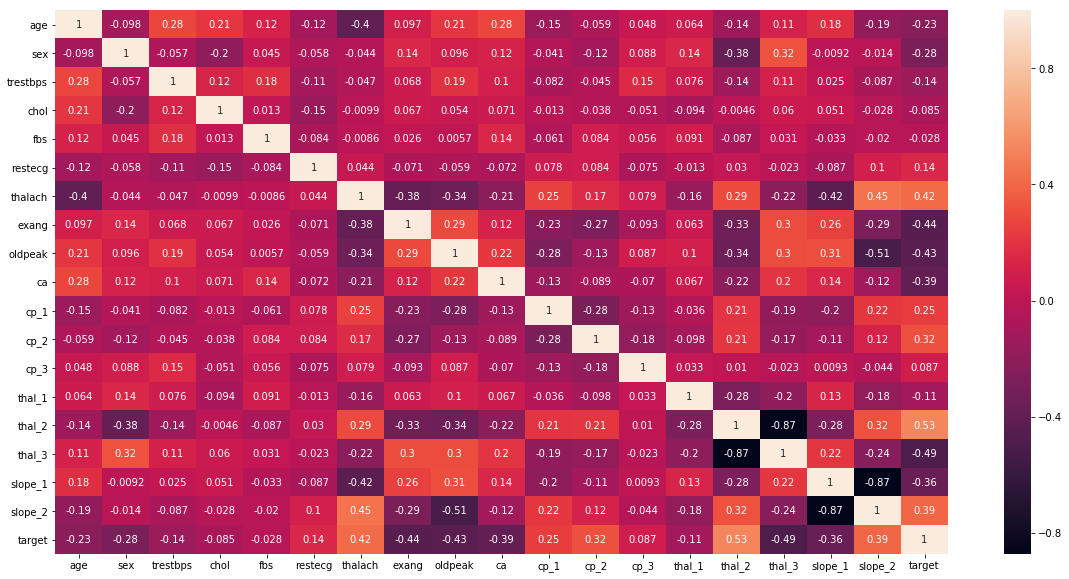

In [30]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(dfNorm.corr(),annot = True)

In [31]:
# Dropping highly correlated variables from X_test
X_test2 = X_test.drop(['slope_1','slope_2','thal_2','thal_3'],1)

# Dropping highly correlated variables from X_train
X_train2 = X_train.drop(['slope_1','slope_2','thal_2','thal_3'],1)


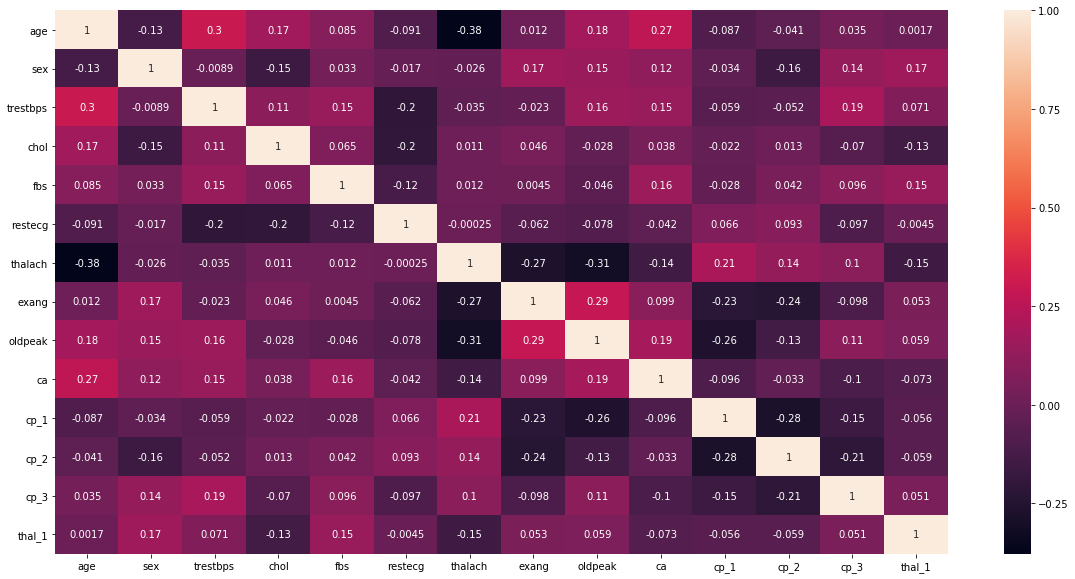

In [32]:
# Checking correlation matrix again
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

#### Re-Running the Model
Now let's run our model again after dropping highly correlated variables

In [33]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.202
Date:                Sat, 09 May 2020   Deviance:                       168.40
Time:                        09:38:56   Pearson chi2:                     185.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0713      1.466      0.731      0.465      -1.801       3.944
age            0.5164      1.240      0.416      0.677      -1.915       2.948
sex           -1.7884      0.510     -3.507      0.000      -2.788      -0.789
trestbps      -1.2838      1.297     -0.990      0.322      -3.827       1.259
chol          -3.1863      2.093     -1.522      0.128      -7.289       0.916
fbs           -0.4014      0.598     -0.672      0.502      -1.573       0.770
restecg        0.1419      0.823      0.172      0.863      -1.471       1.755
thalach        3.3309      1.448      2.301      0.021       0.493       6.168
exang         -0.4926      0.467     -1.055      0.291      -1.407       0.422
oldpeak       -4.3310      1.340     -3.233      0.001      -6.956      -1.706
ca            -3.4463      0.904     -3.812      0.000      -5.218      -1.674
cp_1           1.0683      0.573      1.865      0.062      -0.054       2.191
cp_2           2.0117      0.545      3.690      0.000       0.943       3.080
cp_3           1.8574      0.674      2.757      0.006       0.537       3.178
thal_1         0.9288      0.842      1.102      0.270      -0.722       2.580
==============================================================================
"""

### Feature Selection Using RFE

In [34]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True  True False False False  True False  True  True  True  True
  True False False  True  True False]
[7 1 1 5 9 3 1 2 1 1 1 1 1 8 4 1 1 6]


In [35]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]
print(col)

Index(['sex', 'trestbps', 'thalach', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3',
       'thal_3', 'slope_1'],
      dtype='object')


In [36]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Comparing the model with StatsModels
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                            GLM   Df Residuals:                      201
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77.995
Date:                Sat, 09 May 2020   Deviance:                       155.99
Time:                        09:38:57   Pearson chi2:                     279.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7102      1.077      1.587      0.112      -0.401       3.822
sex           -1.2043      0.518     -2.324      0.020      -2.220      -0.189
trestbps      -0.8449      1.243     -0.680      0.497      -3.281       1.591
thalach        1.8758      1.368      1.371      0.170      -0.806       4.558
oldpeak       -3.5049      1.347     -2.602      0.009      -6.145      -0.865
ca            -3.9143      0.976     -4.012      0.000      -5.826      -2.002
cp_1           0.7187      0.597      1.203      0.229      -0.452       1.890
cp_2           2.0745      0.558      3.721      0.000       0.982       3.167
cp_3           1.7748      0.669      2.653      0.008       0.464       3.086
thal_3        -1.6095      0.436     -3.692      0.000      -2.464      -0.755
slope_1       -0.8142      0.463     -1.757      0.079      -1.722       0.094
==============================================================================
"""

In [38]:
# UDF for calculating vif value to check if any multicollinearity happening here
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [39]:
dfNorm
# ['sex', 'trestbps', 'thalach', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'thal_3', 'slope_1']

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,target
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [40]:
# Calculating Vif value
vif_cal(input_data=dfNorm.drop(['age','chol','fbs','restecg','exang','thal_1','thal_2','slope_2'], axis=1), dependent_col='target')

,Var,Vif
2,thalach,7.06
1,trestbps,5.22
0,sex,3.37
3,oldpeak,2.34
8,thal_3,2.16
9,slope_1,1.97
6,cp_2,1.86
5,cp_1,1.67
4,ca,1.66
7,cp_3,1.26


In [41]:
#Dropping Variable with high VIF and prob >0.01 (insignificant variable)
col=col.drop('thalach')


In [42]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                            GLM   Df Residuals:                      202
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.965
Date:                Sat, 09 May 2020   Deviance:                       157.93
Time:                        09:38:58   Pearson chi2:                     277.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8443      0.721      3.943      0.000       1.431       4.258
sex           -1.1564      0.517     -2.236      0.025      -2.170      -0.143
trestbps      -0.7938      1.249     -0.636      0.525      -3.242       1.654
oldpeak       -3.7629      1.343     -2.802      0.005      -6.395      -1.131
ca            -3.8899      0.967     -4.022      0.000      -5.785      -1.995
cp_1           0.8665      0.579      1.496      0.135      -0.269       2.002
cp_2           2.2039      0.551      4.000      0.000       1.124       3.284
cp_3           1.9770      0.664      2.980      0.003       0.677       3.277
thal_3        -1.6362      0.434     -3.768      0.000      -2.487      -0.785
slope_1       -0.9852      0.444     -2.218      0.027      -1.856      -0.114
==============================================================================
"""

In [43]:
# Calculating Vif value
vif_cal(input_data=dfNorm.drop(['age','chol','fbs','restecg','exang','thal_1','thal_2','slope_2','thalach'], axis=1), dependent_col='target')

,Var,Vif
1,trestbps,3.78
0,sex,2.91
2,oldpeak,2.34
7,thal_3,2.16
8,slope_1,1.97
3,ca,1.66
5,cp_2,1.47
4,cp_1,1.34
6,cp_3,1.23


In [44]:
#Dropping Variable with high VIF and prob >0.01 (insignificant variable)
col=col.drop('trestbps')


In [45]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                            GLM   Df Residuals:                      203
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -79.169
Date:                Sat, 09 May 2020   Deviance:                       158.34
Time:                        09:38:58   Pearson chi2:                     285.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5987      0.604      4.301      0.000       1.414       3.783
sex           -1.1370      0.516     -2.204      0.028      -2.148      -0.126
oldpeak       -3.8292      1.337     -2.865      0.004      -6.449      -1.209
ca            -3.9497      0.964     -4.097      0.000      -5.839      -2.060
cp_1           0.8404      0.577      1.457      0.145      -0.290       1.971
cp_2           2.1934      0.550      3.987      0.000       1.115       3.272
cp_3           1.8749      0.642      2.921      0.003       0.617       3.133
thal_3        -1.6692      0.430     -3.883      0.000      -2.512      -0.827
slope_1       -0.9635      0.442     -2.181      0.029      -1.830      -0.098
==============================================================================
"""

In [46]:
# Calculating Vif value
vif_cal(input_data=dfNorm.drop(['age','chol','fbs','restecg','exang','thal_1','thal_2','slope_2','thalach','trestbps'], axis=1), dependent_col='target')

,Var,Vif
0,sex,2.76
1,oldpeak,2.15
6,thal_3,2.12
7,slope_1,1.91
2,ca,1.61
4,cp_2,1.26
3,cp_1,1.18
5,cp_3,1.14


In [47]:
col=['sex','oldpeak','thal_3','slope_1','ca','cp_2','cp_1','cp_3']

In [48]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Predicted probabilities of heart disease
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)



In [50]:
y_pred_final

,0,ID,1
0,1,0,0.872454
1,0,1,0.037268
2,0,2,0.045394
3,1,3,0.936857
4,1,4,0.586980
...,...,...,...
86,0,86,0.445823
87,0,87,0.064882
88,1,88,0.896955
89,1,89,0.915200


In [51]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'HeartDisease_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head(20)

,0,ID,HeartDisease_Prob
0,1,0,0.872454
1,0,1,0.037268
2,0,2,0.045394
3,1,3,0.936857
4,1,4,0.586980
5,0,5,0.143598
6,1,6,0.110876
7,0,7,0.190976
8,1,8,0.649300
9,0,9,0.395846


In [52]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'target'})

# Let's see the head of y_pred_final
y_pred_final.head(20)

,target,ID,HeartDisease_Prob
0,1,0,0.872454
1,0,1,0.037268
2,0,2,0.045394
3,1,3,0.936857
4,1,4,0.586980
5,0,5,0.143598
6,1,6,0.110876
7,0,7,0.190976
8,1,8,0.649300
9,0,9,0.395846


In [53]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','target','HeartDisease_Prob'], axis=1)
y_pred_final.head(50)

,ID,target,HeartDisease_Prob
0,0,1,0.872454
1,1,0,0.037268
2,2,0,0.045394
3,3,1,0.936857
4,4,1,0.586980
5,5,0,0.143598
6,6,1,0.110876
7,7,0,0.190976
8,8,1,0.649300
9,9,0,0.395846


In [55]:
# Creating new column 'predicted' with 1 if heartdisease_prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.HeartDisease_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head(50)

,ID,target,HeartDisease_Prob,predicted
0,0,1,0.872454,1
1,1,0,0.037268,0
2,2,0,0.045394,0
3,3,1,0.936857,1
4,4,1,0.586980,1
5,5,0,0.143598,0
6,6,1,0.110876,0
7,7,0,0.190976,0
8,8,1,0.649300,1
9,9,0,0.395846,0


#### Model Evaluation

In [56]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.target, y_pred_final.predicted )
confusion

array([[39,  7],
       [ 3, 42]], dtype=int64)

In [58]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.target, y_pred_final.predicted)

0.8901098901098901

In [59]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9285714285714286

In [61]:
# Let us calculate specificity
TN / float(TN+FP)

0.8571428571428571

In [62]:
# Calculate false positive rate - predicting heart disease when customer does not have heart disease
print(FP/ float(TN+FP))

0.14285714285714285


In [63]:
# Calculate false negative rate - not predicting heart disease when customer has heart disease
print(FN/ float(TP+FN))

0.07142857142857142


**Summary:**
    
> 1. The Overall accuracy is 89.01%   
> 2. The Sensitivity is 92.85% and specificity is 85.71%
> 3. The FPR % is 14.28% 
> 4. The FNR should be minimum as it is a healthcare application where we need to identify the disease .Hence the % is 7.14%
